No of nodes = 494
No of edges = 586
Avg in-degree = 1.1862348178137652
Avg out-degree = 1.1862348178137652


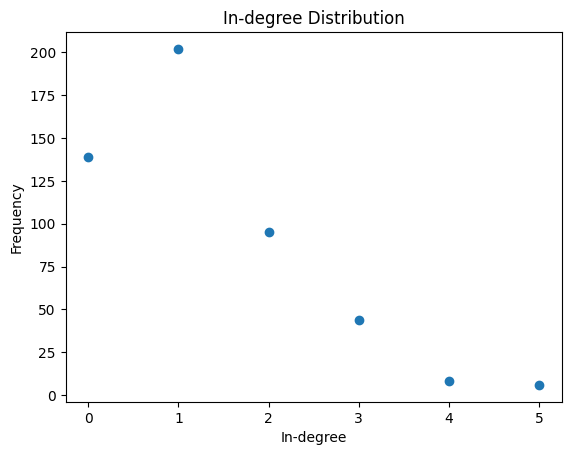

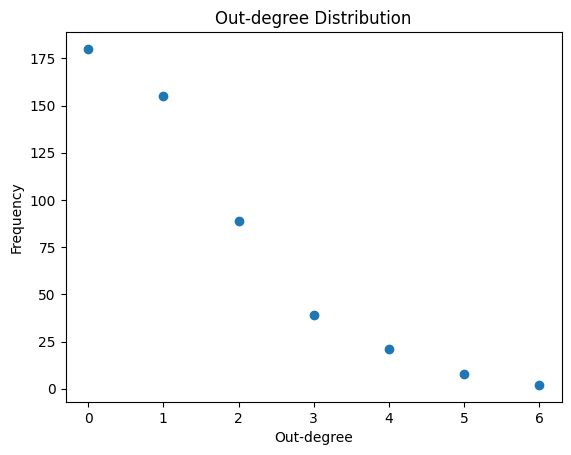

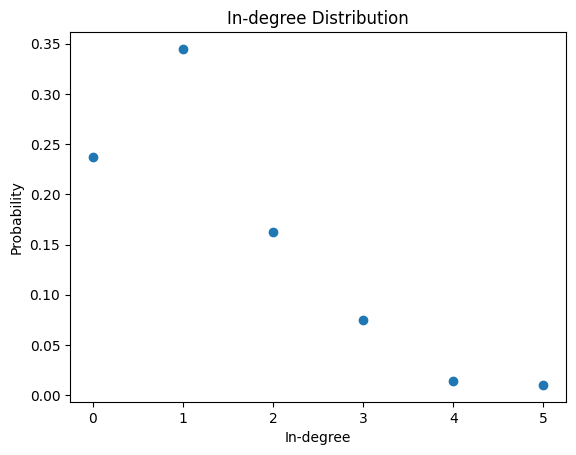

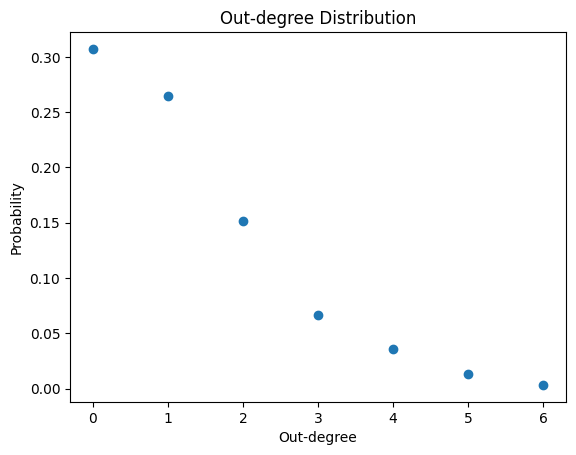

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def create_network_from_mtx(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line[0] != '%':
                dimensions = line.strip().split()
                break
    num_nodes = int(dimensions[0])
    edge_list = []
    with open(file_path, 'r') as file:
        reading_edges = False
        for line in file:
            if line[0] == '%':
                continue
            elif not reading_edges:
                reading_edges = True
                continue
            node1, node2 = [int(x) - 1 for x in line.strip().split()[:2]]  # Two nodes of an edge
            if node1 != node2:  # Ignoring self-edges
                edge_list.append((node1, node2))
    return num_nodes, edge_list

# Create adjacency_matrix from edge_list obtained
def adj_matrix(num_nodes, edge_list):
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for edge in edge_list:
        node1, node2 = edge
        adjacency_matrix[node1, node2] = 1  #directed
    return adjacency_matrix

def calc_degrees(num_nodes, adjacency_matrix):
    in_degrees = np.zeros(num_nodes, dtype=int)
    out_degrees = np.zeros(num_nodes, dtype=int)
    for i in range(len(adjacency_matrix)):
        in_degree = 0
        for j in adjacency_matrix[i]:
            in_degree += j
        in_degrees[i] = in_degree
    for j in range(len(adjacency_matrix)):
        out_degree = 0
        for i in range(len(adjacency_matrix)):
            out_degree += adjacency_matrix[i][j]
        out_degrees[j] = out_degree
    return in_degrees, out_degrees

file_path = 'power-494-bus.mtx'
num_nodes, edge_list = create_network_from_mtx(file_path)
edges = len(edge_list)
print(f"No of nodes = {num_nodes}")
print(f"No of edges = {edges}")
adjacency_matrix = adj_matrix(num_nodes, edge_list)
in_degrees, out_degrees = calc_degrees(num_nodes, adjacency_matrix)
print(f"Avg in-degree = {np.mean(in_degrees)}")
print(f"Avg out-degree = {np.mean(out_degrees)}")

# Dictionaries for recording frequencies
in_d = {}
out_d = {}
for i in in_degrees:
    if i in in_d:
        in_d[i] = in_d[i] + 1
    else:
        in_d[i] = 1
for i in out_degrees:
    if i in out_d:
        out_d[i] = out_d[i] + 1
    else:
        out_d[i] = 1

plt.scatter(in_d.keys(), in_d.values())
plt.xlabel('In-degree')
plt.ylabel('Frequency')
plt.title('In-degree Frequency Distribution')
plt.savefig('In_degree_Frequency_Distribution.png')
plt.show()
print()
plt.scatter(out_d.keys(), out_d.values())
plt.xlabel('Out-degree')
plt.ylabel('Frequency')
plt.title('Out-degree Frequency Distribution')
plt.savefig('Out_degree_Frequency_Distribution.png')
plt.show()
print()
print()
plt.scatter(in_d.keys(), np.divide(list(in_d.values()), edges))
plt.xlabel('In-degree')
plt.ylabel('Probability')
plt.savefig('In_degree_Probability_Distribution.png')
plt.title('In-degree Probability Distribution')
plt.show()
print()
plt.scatter(out_d.keys(), np.divide(list(out_d.values()), edges))
plt.xlabel('Out-degree')
plt.ylabel('Probability')
plt.title('Out-degree Probability Distribution')
plt.savefig('Out_degree_Probability_Distribution.png')
plt.show()


P.S. The graphs may not be entirely visible in the pdf, kindly refer to the PNG files.